In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.interpolate import RectBivariateSpline

# i/o

In [2]:
data = np.load("../snapshots_w_prime.npz")

# intrp

In [3]:
intrp = {}

x1d_desired = np.arange(0,90*333.0,333.0)
y1d_desired = x1d_desired.copy()

for ifile,f in enumerate(data.files):
    tmp  = data[f].copy()
    if ((f=="les")or(f=="les_raw")):
        delta = 25.0
    else:
        delta = 333.0
    npts, npts = tmp.shape
    x1d = np.arange(0,npts*delta,delta)
    y1d = x1d.copy()
    func = RectBivariateSpline(x1d, y1d, tmp)
    intrp[f] = func(x1d_desired, y1d_desired)

# viz fields

.......................
les_raw
Mean : -0.00
Std. Dev. : 0.089
Variance : 0.008
.......................
les
Mean : 0.00
Std. Dev. : 0.040
Variance : 0.002
.......................
vles
Mean : -0.00
Std. Dev. : 0.023
Variance : 0.001
.......................
ysu
Mean : 0.00
Std. Dev. : 0.027
Variance : 0.001
.......................
mynn
Mean : 0.00
Std. Dev. : 0.028
Variance : 0.001
.......................
sh
Mean : -0.00
Std. Dev. : 0.027
Variance : 0.001


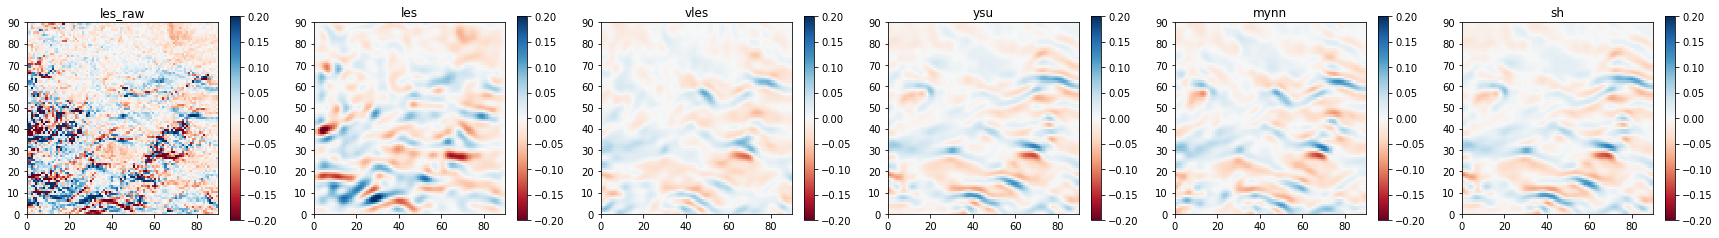

In [4]:
fig = plt.figure(figsize=(6*5,5))
axs = {}
for ifile,f in enumerate(data.files):
    axs[ifile]  = fig.add_subplot(1,6,ifile+1,aspect="equal")
    p = axs[ifile].pcolormesh(intrp[f],vmin=-0.2,vmax=0.2,cmap="RdBu")    
    plt.colorbar(p, shrink=0.75)
    axs[ifile].set_title(f)
    print(".......................")
    print(f)
    print("Mean : {0:.2f}".format(np.mean(data[f])))
    print("Std. Dev. : {0:.3f}".format(np.std(data[f])))    
    print("Variance : {0:.3f}".format(np.var(data[f])))        

.......................
les_raw
Mean : -0.00
Std. Dev. : 0.089
Variance : 0.008
.......................
les
Mean : 0.00
Std. Dev. : 0.040
Variance : 0.002
.......................
vles
Mean : -0.00
Std. Dev. : 0.023
Variance : 0.001
.......................
ysu
Mean : 0.00
Std. Dev. : 0.027
Variance : 0.001
.......................
mynn
Mean : 0.00
Std. Dev. : 0.028
Variance : 0.001
.......................
sh
Mean : -0.00
Std. Dev. : 0.027
Variance : 0.001


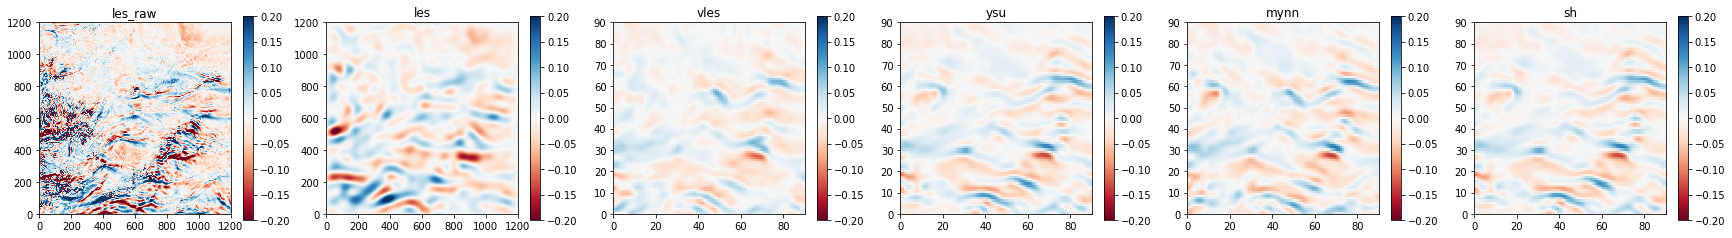

In [5]:
fig = plt.figure(figsize=(6*5,5))
axs = {}
for ifile,f in enumerate(data.files):
    axs[ifile]  = fig.add_subplot(1,6,ifile+1,aspect="equal")
    p = axs[ifile].pcolormesh(data[f],vmin=-0.2,vmax=0.2,cmap="RdBu")    
    plt.colorbar(p, shrink=0.75)
    axs[ifile].set_title(f)
    print(".......................")
    print(f)
    print("Mean : {0:.2f}".format(np.mean(data[f])))
    print("Std. Dev. : {0:.3f}".format(np.std(data[f])))    
    print("Variance : {0:.3f}".format(np.var(data[f])))        

In [13]:
psd2 = {}
ps2  = {}
fr2  = {}
for ifile,f in enumerate(data.files):
    print('............')
    print(f)
    fft   = fftpack.fft2(intrp[f])    
    (npts, npts) = fft.shape
    
    #ps1   = np.abs(fft)**2 
    ps1   = (fft*np.conjugate(fft))**2

    delta = 333.0 #25.0 if ((f=="les")or(f=="les_raw")) else 333.0
    print(delta, npts)
    fr2[f] = fftpack.fftshift(fftpack.fftfreq(npts, delta))
    df    = np.unique(np.diff(fr2[f]))[0]
    print(df)
    ps2[f] = fftpack.fftshift(ps1)
    psd2[f]= ps1.copy()#/np.abs(df)

............
les_raw
333.0 90
3.336670003336651e-05
............
les
333.0 90
3.336670003336651e-05
............
vles
333.0 90
3.336670003336651e-05
............
ysu
333.0 90
3.336670003336651e-05
............
mynn
333.0 90
3.336670003336651e-05
............
sh
333.0 90
3.336670003336651e-05


/Users/pdoubraw/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


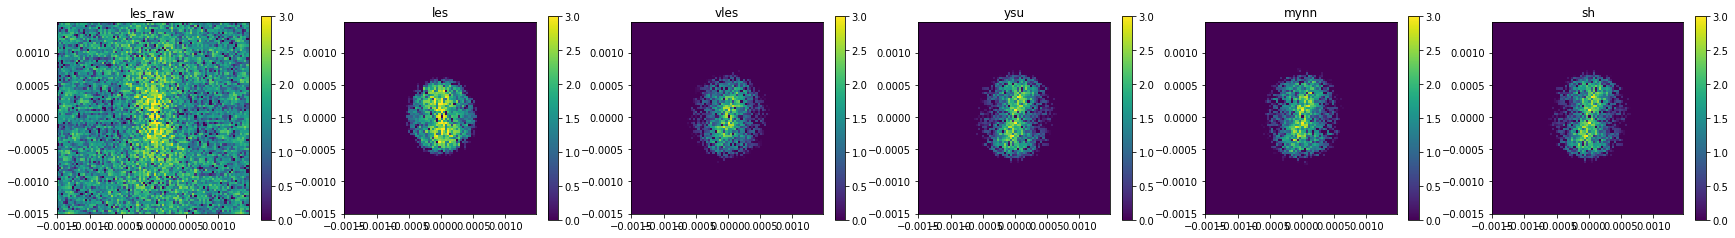

In [12]:
fig = plt.figure(figsize=(6*5,5))
axs = {}
for ifile,f in enumerate(data.files):
    axs[ifile]  = fig.add_subplot(1,6,ifile+1,aspect="equal")
    factor =  1#/npts#(333/25.)**2 if not((f=="les")or(f=="les_raw")) else 1
    p = axs[ifile].pcolormesh(fr[f], fr[f], np.log10(ps[f]*factor),vmin=0,vmax=3)    
    plt.colorbar(p, shrink=0.75)
    axs[ifile].set_title(f)

In [19]:
f='les'

In [20]:
fft   = fftpack.fft2(intrp[f])    
(npts, npts) = fft.shape

In [21]:
fft

array([[ 2.10533842e-02 +0.j        , -4.66023278e+00-31.03190522j,
        -3.77539097e+00-23.19597491j, ...,  2.53640707e+00 -5.70519645j,
        -3.77539097e+00+23.19597491j, -4.66023278e+00+31.03190522j],
       [ 3.29262264e+00 -2.41855273j, -1.36833203e+01-19.91350647j,
        -1.59447618e-01 -0.60048751j, ..., -6.56189745e+00+13.38547048j,
        -1.57754158e+00 +4.83604708j,  2.43253520e+01 +8.28185945j],
       [ 6.54695733e+00-38.36469908j,  8.39046061e+00 +1.48684948j,
         4.76584602e-01 -0.44417726j, ...,  3.01835044e+00 -2.29818617j,
        -8.40493957e+00 -5.99342922j, -3.45063604e+00 +7.58642576j],
       ...,
       [-5.44954635e-01+37.52996856j,  2.25152953e+01 +9.58053092j,
        -4.11776612e+00-34.75354263j, ...,  8.54582407e+00 -4.14045547j,
        -1.02187000e+01 -9.16542455j,  2.77669484e+01 +0.51437516j],
       [ 6.54695733e+00+38.36469908j, -3.45063604e+00 -7.58642576j,
        -8.40493957e+00 +5.99342922j, ..., -1.30879131e+01 +3.18237046j,
       

In [22]:
np.abs(fft)**2

array([[4.43244985e-04, 9.84696911e+02, 5.52306829e+02, ...,
        3.89826273e+01, 5.52306829e+02, 9.84696911e+02],
       [1.66907611e+01, 5.83780994e+02, 3.86008787e-01, ...,
        2.22229318e+02, 2.58759887e+01, 6.60311944e+02],
       [1.51471279e+03, 7.26105506e+01, 4.24426320e-01, ...,
        1.43920990e+01, 1.06564203e+02, 6.94607449e+01],
       ...,
       [1.40879552e+03, 5.98725097e+02, 1.22476472e+03, ...,
        9.01744805e+01, 1.88426837e+02, 7.71268007e+02],
       [1.51471279e+03, 6.94607449e+01, 1.06564203e+02, ...,
        1.81420950e+02, 4.24426320e-01, 7.26105506e+01],
       [1.66907611e+01, 6.60311944e+02, 2.58759887e+01, ...,
        3.68900323e+01, 3.86008787e-01, 5.83780994e+02]])

In [25]:
(np.conj(fft) * fft).real

array([[4.43244985e-04, 9.84696911e+02, 5.52306829e+02, ...,
        3.89826273e+01, 5.52306829e+02, 9.84696911e+02],
       [1.66907611e+01, 5.83780994e+02, 3.86008787e-01, ...,
        2.22229318e+02, 2.58759887e+01, 6.60311944e+02],
       [1.51471279e+03, 7.26105506e+01, 4.24426320e-01, ...,
        1.43920990e+01, 1.06564203e+02, 6.94607449e+01],
       ...,
       [1.40879552e+03, 5.98725097e+02, 1.22476472e+03, ...,
        9.01744805e+01, 1.88426837e+02, 7.71268007e+02],
       [1.51471279e+03, 6.94607449e+01, 1.06564203e+02, ...,
        1.81420950e+02, 4.24426320e-01, 7.26105506e+01],
       [1.66907611e+01, 6.60311944e+02, 2.58759887e+01, ...,
        3.68900323e+01, 3.86008787e-01, 5.83780994e+02]])

In [14]:
fig = plt.figure(figsize=(6*5,5))
axs = {}
for ifile,f in enumerate(data.files):
    axs[ifile]  = fig.add_subplot(1,6,ifile+1,aspect="equal")
    factor =  1#/npts#(333/25.)**2 if not((f=="les")or(f=="les_raw")) else 1
    p = axs[ifile].pcolormesh(fr2[f], fr2[f], np.log10(ps2[f]*factor),vmin=0,vmax=3)    
    plt.colorbar(p, shrink=0.75)
    axs[ifile].set_title(f)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x112765950> (for post_execute):


TypeError: Cannot cast array data from dtype('complex128') to dtype('int64') according to the rule 'safe'

TypeError: Cannot cast array data from dtype('complex128') to dtype('int64') according to the rule 'safe'

<Figure size 2160x360 with 12 Axes>

In [96]:
90**2

8100

In [88]:
f = 'vles'

In [90]:
333/25.

13.32

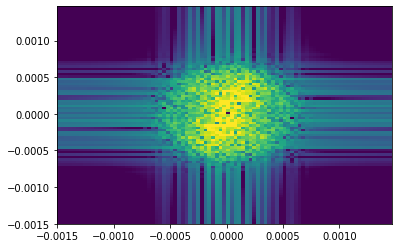

In [94]:
plt.pcolormesh(fr[f], fr[f], np.log10(ps[f]*(90**2)),vmin=1,vmax=6) 

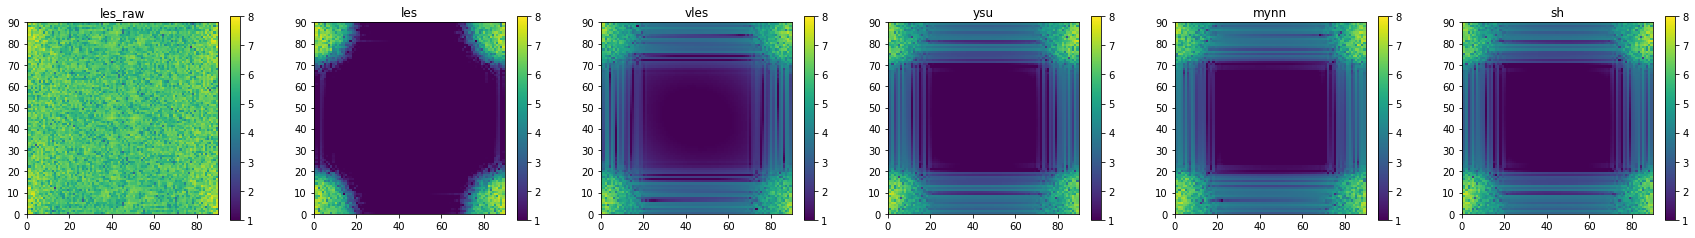

In [75]:
fig = plt.figure(figsize=(6*5,5))
axs = {}
for ifile,f in enumerate(data.files):
    axs[ifile]  = fig.add_subplot(1,6,ifile+1,aspect="equal")
    p = axs[ifile].pcolormesh(np.log10(psd[f]),vmin=1,vmax=8)    
    plt.colorbar(p, shrink=0.75)
    axs[ifile].set_title(f)

In [76]:
for ifile,f in enumerate(data.files):
    print(f)
    print(np.sum(ps[f]))

les_raw
517250.85540363437
les
102800.52296842443
vles
35649.0568273215
ysu
49476.73340162989
mynn
52001.442442161875
sh
49467.16409549315
